In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
data = pd.read_csv("./weather/data.csv", skiprows=[0, 1, 2, 4], encoding="shift_jis")

In [17]:
temp_data = data['平均気温(℃)']
print(temp_data)

0       4.2
1       4.6
2       5.2
3       3.8
4       3.9
       ... 
2187    3.9
2188    3.9
2189    5.7
2190    5.0
2191    3.0
Name: 平均気温(℃), Length: 2192, dtype: float64


In [18]:
data[1820:1830]

,年月日,平均気温(℃),平均気温(℃).1,平均気温(℃).2
1820,2016/12/25,5.6,8,2
1821,2016/12/26,5.3,8,2
1822,2016/12/27,8.2,8,2
1823,2016/12/28,5.2,8,2
1824,2016/12/29,3.3,8,2
1825,2016/12/30,5.4,8,2
1826,2016/12/31,5.2,8,2
1827,2017/1/1,6.8,8,2
1828,2017/1/2,6.4,8,2
1829,2017/1/3,7.4,8,2


In [29]:
train_x = temp_data[:1827]
test_x = temp_data[1826:]
print(type(train_x))
print(type(test_x))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [30]:
train_x = np.array(train_x)
test_x = np.array(test_x)

In [31]:
print(type(train_x))
print(type(test_x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [32]:
train_x

array([4.2, 4.6, 5.2, ..., 3.3, 5.4, 5.2])

In [33]:
len(train_x)

1827

In [34]:
test_x

array([ 5.2,  6.8,  6.4,  7.4,  7.7,  5.8,  3.8,  3. ,  3. ,  7.6,  7.6,
        6.1,  4.7,  4.7,  1.3, -0.1,  2.1,  4.5,  4.4,  5.5,  2.3,  5.4,
        5.3,  3.3,  1.6,  3.3,  3.6,  6.2,  7.6,  7.5, 10.3,  5.3,  4.9,
        4.1,  6.7,  7.9,  6.5,  8. ,  5.2,  6. ,  1.9,  4. ,  3.1,  3.9,
        5.5,  5.5,  6.1,  6.7, 12.2,  7.6,  5.6,  7.9,  5.6,  6.2, 10.9,
        7. ,  7.1,  8.4,  6.1,  5.4,  6.2,  6.5,  8. ,  8.5,  9.7,  8.9,
        6. ,  5. ,  6.8,  7.9,  7.6,  7.2,  8.2,  7.9,  5.4,  7.8,  9. ,
        9.5, 11.4, 12.3,  9.2,  9.5,  9.1,  8. ,  7.5,  5.5,  5.1,  8.2,
        8.5, 11.7,  8.7,  6.1,  8.3, 10. , 10.9, 14.4, 16.4, 17.9, 14.7,
       13.8, 10.4,  8. , 13.5, 12.2, 15. , 18.7, 19.2, 18.4, 20.1, 17.5,
       15.6, 15.5, 13.9, 13.7, 14.5, 16. , 16.7, 15.5, 15.9, 16.5, 18.1,
       17.2, 16.7, 17. , 18.3, 19.9, 22.2, 20.2, 21.4, 19.2, 16.4, 21.6,
       21.6, 17.8, 18. , 17.6, 18.8, 17.1, 17.8, 20.4, 22.6, 24.6, 24.1,
       23. , 22.1, 20.5, 18.6, 20.2, 20.9, 21.9, 24

In [35]:
len(test_x)

366

In [36]:
# ミニバッチ用のデータを作る

In [37]:
window_size = 180
temp = []
train_X = []

for i in range(0, len(train_x) - window_size):
    temp.append(train_x[i:i+window_size])
    
train_X = np.array(temp)

In [38]:
pd.DataFrame(train_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,4.2,4.6,5.2,3.8,3.9,4.2,4.5,4.5,4.1,4.9,...,23.5,26.7,23.5,20.7,22.5,22.8,18.3,19.6,20.8,22.3
1,4.6,5.2,3.8,3.9,4.2,4.5,4.5,4.1,4.9,4.6,...,26.7,23.5,20.7,22.5,22.8,18.3,19.6,20.8,22.3,23.4
2,5.2,3.8,3.9,4.2,4.5,4.5,4.1,4.9,4.6,2.4,...,23.5,20.7,22.5,22.8,18.3,19.6,20.8,22.3,23.4,23.4
3,3.8,3.9,4.2,4.5,4.5,4.1,4.9,4.6,2.4,4.0,...,20.7,22.5,22.8,18.3,19.6,20.8,22.3,23.4,23.4,21.5
4,3.9,4.2,4.5,4.5,4.1,4.9,4.6,2.4,4.0,3.8,...,22.5,22.8,18.3,19.6,20.8,22.3,23.4,23.4,21.5,22.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,23.5,25.8,26.9,30.2,28.2,21.6,23.6,27.7,25.5,22.5,...,5.4,7.0,9.6,9.0,9.2,12.7,13.0,7.8,5.6,5.3
1643,25.8,26.9,30.2,28.2,21.6,23.6,27.7,25.5,22.5,26.2,...,7.0,9.6,9.0,9.2,12.7,13.0,7.8,5.6,5.3,8.2
1644,26.9,30.2,28.2,21.6,23.6,27.7,25.5,22.5,26.2,28.1,...,9.6,9.0,9.2,12.7,13.0,7.8,5.6,5.3,8.2,5.2
1645,30.2,28.2,21.6,23.6,27.7,25.5,22.5,26.2,28.1,27.6,...,9.0,9.2,12.7,13.0,7.8,5.6,5.3,8.2,5.2,3.3


In [39]:
# モデルの定義

In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(180, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 180)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
model = Net()

In [53]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.015)

for epoch in range(1000):
    total_loss = 0
    input_x = []
    
    # ミニバッチの作成
    for i in range(100):
        index = np.random.randint(0, 1646)
        input_x.append(train_X[index])
        
    input_x = np.array(input_x, dtype='float32') # 180次元データのミニバッチ100個
    input_x = Variable(torch.from_numpy(input_x))
    #print(type(input_x))
    #print(input_x.size())
    
    optimizer.zero_grad()
    output = model(input_x)
    
    loss = criterion(output, input_x)
    loss.backward()
    optimizer.step()
    
    total_loss += loss.item()
    
    if (epoch + 1) % 100 == 0:
        print(epoch+1, total_loss)

100 nan
200 nan
300 nan
400 nan
500 nan
600 nan
700 nan
800 nan
900 nan
1000 nan


In [ ]:
# どうがんばっても誤差が発散する。

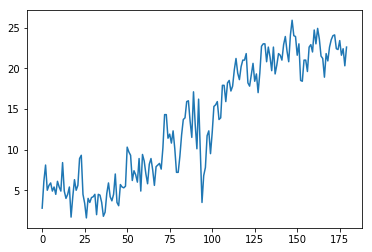

In [57]:
plt.plot(input_x.data[0].numpy(), label='input')
#plt.plot(output.data[0].numpy(), label='output')

### 異常値の検出

In [60]:
input_x = []
test_X = []

input_x.append(test_x[0:180])
input_x.append(test_x[180:360])
test_X = np.array(input_x, dtype='float32')

In [62]:
pd.DataFrame(test_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,5.2,6.800000,6.400000,7.400000,7.7,5.800000,3.8,3.000000,3.000000,7.6,...,23.5,23.4,22.1,24.1,24.9,24.799999,22.799999,23.9,23.299999,23.0
1,25.0,23.700001,23.299999,26.299999,29.1,26.799999,26.6,26.299999,27.200001,28.4,...,6.6,5.4,3.5,5.5,4.6,3.700000,4.100000,5.8,5.800000,8.4


In [64]:
input_test = Variable(torch.from_numpy(test_X))
output = model(input_test)

In [65]:
output

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan

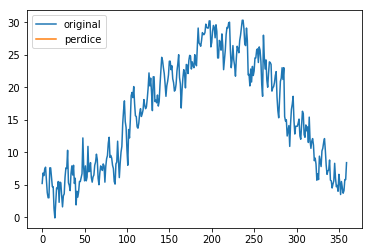

In [67]:
plt.plot(test_X.flatten(), label='original')
plt.plot(output.data.numpy().flatten(), label="perdice")
plt.legend(loc='upper left')

In [70]:
test = test_x.flatten()
predict = output.data.numpy().flatten()

total_score = []
for i in range(0, 360):
    diff = test[i] - predict[i]
    score = pow(diff, 2)
    total_score.append(score)
    
total_score = np.array(total_score)
max_score = np.max(total_score)

total_score = total_score / max_score

In [71]:
print(total_score)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na